# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выпфолнения проекта. 

</div>

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Краткий план настоящей работы

- определить и заполнить пропущенные значения;
- исследовать и заменить при необходимости типы данных;
- исследовать и удалить дубликаты;
- посчитать и добавить в набор данных цену квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (варианты — первый, последний, другой), соотношение жилой и общей площади, отношение площади кухни к общей;
- изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра;
- изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану;
- описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?;
- убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены;
- выделить - какие факторы больше всего влияют на стоимость квартиры?;
- изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра;
- изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;
- изучите зависимость от даты размещения: дня недели, месяца и года;
- выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах;
- выделить населённые пункты с самой высокой и низкой стоимостью жилья;
- изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра;
- выделить квартиры в Санкт-Петербурге;
- выяснить, какая область входит в центр города;
- создать столбец с расстоянием до центра в километрах: округлить до целых значений;
- посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра;
- выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков;
- выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы; 
- отличаются ли они от общих выводов по всему городу?
- сделать общий вывод по проделанной работе.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импорт библиотек используемых в проекте
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
residence = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
print('Размер набора данных:', residence.shape)

Размер набора данных: (23699, 22)


Посмотрим информацию по набору данных и оценим пропуски

In [4]:
residence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропусков большое количество в различных столбцах, разберемся с заполнением и природой пропусков на следующих этапе работы с набором данных.

Выведем информацию о пропусках по каждому из столбцов (процент содержания NaN в каждом столбце относительно общего количества строк):

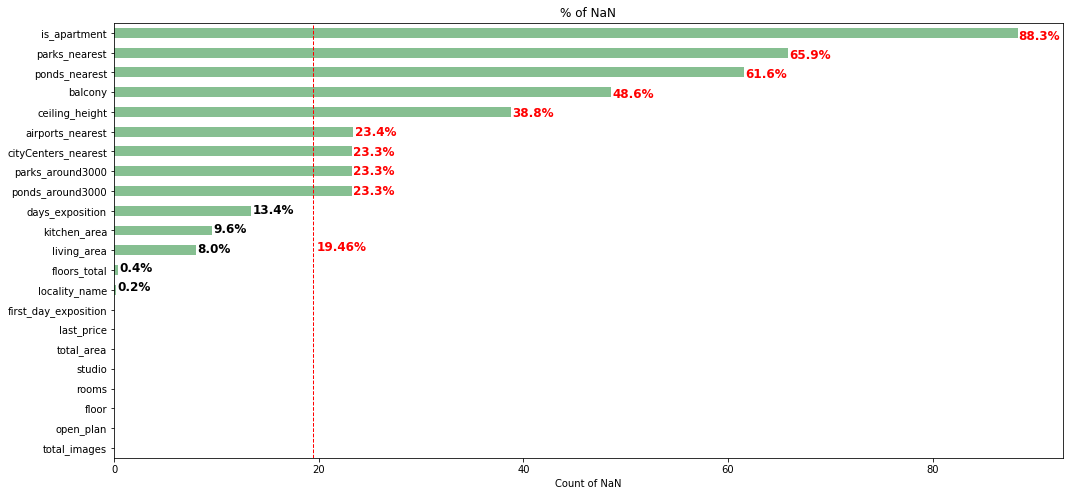

In [5]:
#для этого напишем функцию, которая будет строить график процентного соотношения 
#пропущенных значений к общему количеству строк и показывать среднее значение пропущенных значений в столбцах

#эту фунцию я честно нашел на просторах интернета, она мне очень понравилась, 
#я решил ее здесь применить и оставить, на мой взгляд, очень удобная

def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN', 
                               color='#86bf91', legend=False, fontsize=10)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'black'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    return ax, threshold

plot, threshold = percent_hbar(residence)


Посмотрим количество пропусков по каждому из интересующих нас столбцу, возможно проявятся закономерности.

In [6]:
print('Количество NaN в столбце is_apartment:', residence['is_apartment'].isnull().sum())
print('Количество NaN в столбце parks_nearest :', residence['parks_nearest'].isnull().sum())
print('Количество NaN в столбце ponds_nearest:', residence['ponds_nearest'].isnull().sum())
print('Количество NaN в столбце balcony:', residence['balcony'].isnull().sum())
print('Количество NaN в столбце ceiling_height:', residence['ceiling_height'].isnull().sum())
print('Количество NaN в столбце airports_nearest:', residence['airports_nearest'].isnull().sum())
print('Количество NaN в столбце cityCenters_nearest:', residence['cityCenters_nearest'].isnull().sum())
print('Количество NaN в столбце parks_around3000:', residence['parks_around3000'].isnull().sum())
print('Количество NaN в столбце ponds_around3000:', residence['ponds_around3000'].isnull().sum())
print('Количество NaN в столбце days_exposition:', residence['days_exposition'].isnull().sum())
print('Количество NaN в столбце kitchen_area:', residence['kitchen_area'].isnull().sum())
print('Количество NaN в столбце living_area:', residence['living_area'].isnull().sum())
print('Количество NaN в столбце floors_total:', residence['floors_total'].isnull().sum())
print('Количество NaN в столбце locality_name:', residence['locality_name'].isnull().sum())

Количество NaN в столбце is_apartment: 20924
Количество NaN в столбце parks_nearest : 15620
Количество NaN в столбце ponds_nearest: 14589
Количество NaN в столбце balcony: 11519
Количество NaN в столбце ceiling_height: 9195
Количество NaN в столбце airports_nearest: 5542
Количество NaN в столбце cityCenters_nearest: 5519
Количество NaN в столбце parks_around3000: 5518
Количество NaN в столбце ponds_around3000: 5518
Количество NaN в столбце days_exposition: 3181
Количество NaN в столбце kitchen_area: 2278
Количество NaN в столбце living_area: 1903
Количество NaN в столбце floors_total: 86
Количество NaN в столбце locality_name: 49


###### Вывод по пропускам в наборе данных.

Средний процент пропусков в столбцах составляет порядка 19%. Этот порог преодолели 9 столбцов из 22.
Разберем столбцы с пропущенными значениями:
- is_apartment — апартаменты (булев тип) - сложный тип данных, заполняется людьми, какой процент людей знает разницу между квартирой и апартаментами, на сто процентов доверять даже заполненным данным в этом столбце нельзя;
- parks_nearest — расстояние до ближайшего парка (м) - данный вид пропуска заполнить адекватным значением будет проблематично, ввиду отсутствия дополнительных сведений, скорее всего эти данные генерируются машиной;
- ponds_nearest — расстояние до ближайшего водоёма (м) - аналогично пропускам по переменной parks_nearest;
- balcony — число балконов - вероятнее всего, пропуски это остутсвие балкона, люди оставляли поле пустым;
- ceiling_height — высота потолков (м), высоту потолков, думаю этот параметр люди леняться заполнять, так как наверняка не знают, а гадать не хотят, оставляют поле пустым;
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м),   - данный вид пропуска заполнить адекватным значением будет проблематично, ввиду отсутствия дополнительных сведений, скорее всего эти данные генерируются машиной;
- cityCenters_nearest — расстояние до центра города (м) - данный вид пропуска заполнить адекватным значением будет проблематично, ввиду отсутствия дополнительных сведений, скорее всего эти данные генерируются машиной;
- parks_around3000 — число парков в радиусе 3 км, думаю данные генерируются машиной, заполнить эти сведения возможно получится сформировав дополнительный столбец с группами по значениям расстояния от центра, и далее взять среднее количество парков для этих групп и присвоить на место отсутствующих значений;
- ponds_around3000 — число водоёмов в радиусе 3 км - аналогично паркам;
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - данные могут отсутствовать по необязательности пользователя, сделка закрыта, но на ресурсе пользователь не поставил "галочку" что сделка закрыта, это так же возможная причина большого разброса значений в этом столбце;
- kitchen_area — площадь кухни в квадратных метрах (м²), предположительно здесь причиной могут являться квартиры студии, где площадь кухни значение не столь осязаемое как в стандартной квартире;
- living_area — жилая площадь в квадратных метрах(м²), аналогично столбцу kitchen_area, думаю при заполнение данными пренебрегли;
- floors_total — всего этажей в доме, пропусков очень мало, 86 штук, думаю их природа, человеческий фактор;
- locality_name — название населённого пункта, аналогично этажности, количество пропусков очень мало, человеческий фактор, возможно потеря данных при переносах баз, обработке инормации.

Есть подозрение что пропуски в парах столбцов parks_around3000 - ponds_around3000, parks_nearest - ponds_nearest и  airports_nearest - cityCenters_nearest коррелируют, возможно, их природа одинакова. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличное описание столбцов

Посмотрим разброс значений в столбцах методом describe()

In [7]:
residence.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Набор данных содержит некоторые данные, которые требуют проверки, например 19ти - комнатные квартиры, 900 кв. м. площадь квартиры.

In [8]:
#найдем количество грубых дубликатов
print('Количество грубых дубликатов в наборе данных:', residence.duplicated().sum())

Количество грубых дубликатов в наборе данных: 0


In [9]:
#выведем на экран случайные 10 записей набора данных
data_sample_20 = residence.sample(20)
data_sample_20

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2800,16,3700000.0,42.4,2017-12-12T00:00:00,1,NaN,17.0,19.0,2,NaN,...,10.7,NaN,Санкт-Петербург,25360.0,14749.0,0.0,NaN,0.0,NaN,42.0
8192,8,3650000.0,38.4,2017-10-25T00:00:00,1,NaN,12.0,20.0,12,NaN,...,10.0,NaN,Санкт-Петербург,15760.0,15976.0,1.0,719.0,0.0,NaN,75.0
7125,5,17000000.0,177.8,2015-07-09T00:00:00,5,3.20,6.0,116.2,5,NaN,...,19.1,0.0,Санкт-Петербург,21583.0,1211.0,1.0,437.0,2.0,22.0,439.0
12452,0,4600000.0,35.0,2019-04-05T00:00:00,1,2.50,18.0,18.0,3,NaN,...,8.0,NaN,Санкт-Петербург,15791.0,10629.0,0.0,NaN,1.0,1141.0,5.0
9719,6,3700000.0,41.7,2018-10-11T00:00:00,3,2.50,5.0,29.8,3,NaN,...,5.3,NaN,Санкт-Петербург,15724.0,14520.0,1.0,673.0,1.0,311.0,4.0
1963,3,3600000.0,54.0,2015-07-22T00:00:00,2,NaN,9.0,33.0,8,False,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,412.0
9856,13,12000000.0,106.0,2018-07-30T00:00:00,6,2.80,3.0,70.0,1,NaN,...,15.0,NaN,Санкт-Петербург,20290.0,4733.0,0.0,NaN,1.0,238.0,NaN
23072,5,2640000.0,33.0,2018-02-17T00:00:00,1,NaN,3.0,20.0,1,NaN,...,6.0,NaN,Колпино,26308.0,32095.0,1.0,278.0,3.0,255.0,327.0
22356,6,2050000.0,17.2,2019-01-13T00:00:00,1,2.77,23.0,NaN,1,False,...,NaN,NaN,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0
18814,20,1200000.0,31.0,2018-03-26T00:00:00,1,2.50,5.0,16.0,1,NaN,...,7.1,NaN,деревня Гарболово,NaN,NaN,NaN,NaN,NaN,NaN,312.0


### Вывод

Основная проблема набора - пропущенные значения, затем уже проблема с "выбросами" по некоторым столбцам и их количестве. Приступим к решению.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и рчень детально изучены, класс

### Шаг 2. Предобработка данных

###### <font color=red> Обрабатываем пропуски в столбце is_apartment

In [10]:
print('Количество NaN в столбце is_apartment:', residence['is_apartment'].isnull().sum())

Количество NaN в столбце is_apartment: 20924


In [11]:
residence['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [12]:
residence['is_apartment'] = residence['is_apartment'].fillna(False)

Принято решение заполнить пропуски в этом столбце значением False, конечно скорее всего это далеко от действительности, от истинного соотношения True и False в наборе данных, но без дополнительных сведений более адекватно заполнить этот столбец идей нет.

###### <font color=red> Обрабатываем пропуски в столбцах: 
- parks_nearest; 
- ponds_nearest;
- parks_around3000;
- ponds_around3000.

In [13]:
print('Количество NaN в столбце parks_nearest :', residence['parks_nearest'].isnull().sum())
print('Количество NaN в столбце ponds_nearest:', residence['ponds_nearest'].isnull().sum())
print('Количество NaN в столбце parks_around3000:', residence['parks_around3000'].isnull().sum())
print('Количество NaN в столбце ponds_around3000:', residence['ponds_around3000'].isnull().sum())

Количество NaN в столбце parks_nearest : 15620
Количество NaN в столбце ponds_nearest: 14589
Количество NaN в столбце parks_around3000: 5518
Количество NaN в столбце ponds_around3000: 5518


Заполнение пропусков по этим столбцам объединил в одну группу. На мой взгляд они очень схожи, расстояния до парков и прудов, как и их количество предлагаю заполнить значением 0.
Ниже приведены срезы данных на логику есть ли данные о количество парков/прудов при наличии данных в столбце расстояние до объекта, и наоборот.
Надено 4 записи о парках, расстояние до них превышает 3 км. Эти сведения предлагается оставить, так как их количество очень маленькое по выборке.

In [14]:
residence.query('parks_around3000 > 0 & parks_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [15]:
residence.query('parks_around3000 == 0 & parks_nearest > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,False,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,...,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


In [16]:
residence.query('ponds_around3000 > 0 & ponds_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [17]:
residence.query('ponds_around3000 == 0 & ponds_nearest > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [18]:
residence['parks_around3000'] = residence['parks_around3000'].fillna(0)
residence['parks_nearest'] = residence['parks_nearest'].fillna(0)
residence['ponds_around3000'] = residence['ponds_around3000'].fillna(0)
residence['ponds_nearest'] = residence['ponds_nearest'].fillna(0)

###### <font color=red> Обрабатываем пропуски в столбцах: 
- airports_nearest;
- cityCenters_nearest.

Значения в airports_nearest заполняется автоматически машиной, природа пропуска думаю в том что в городе где находится объект и в соседних, нет аэропорта. 

Заполнить сведения этих двух столбцов средними значениями по месту нахождения невозможно, данных не хватает, в наборе данных присутствуют как большие города так и очень маленькие ПГТ, в которых про аэропорт речь не ведется, здесь следует использовать более серьезную модель с  поиском этих значений по координатам на карте, что выходит за рамки настоящего исследования. 

In [19]:
print('Количество NaN в столбце airports_nearest:', 
      residence['airports_nearest'].isnull().sum())
print('Количество NaN в столбце cityCenters_nearest:', 
      residence['cityCenters_nearest'].isnull().sum())

Количество NaN в столбце airports_nearest: 5542
Количество NaN в столбце cityCenters_nearest: 5519


###### <font color=red> Обрабатываем пропуски в столбце - balcony.

В тех строках где данные по балконам отсутствуют, устанавливаем значение - 0, т.е. балкон отсутствует.

In [20]:
residence['balcony'] = residence['balcony'].fillna(0)

###### <font color=red> Обрабатываем пропуски в столбце - ceiling_height.

Присвоим пропускам средние значения высоты потолков по всему набору данных.

In [21]:
ceiling_height_mean = residence['ceiling_height'].mean()
residence['ceiling_height'] = residence['ceiling_height'].fillna(ceiling_height_mean)
ceiling_height_mean

2.77149889685604

In [22]:
print('Количество NaN в столбце ceiling_height:', residence['ceiling_height'].isnull().sum())

Количество NaN в столбце ceiling_height: 0


###### <font color=red> Обрабатываем пропуски в столбце - days_exposition.

Данные могут отсутствовать по необязательности пользователя, сделка закрыта, но на ресурсе пользователь не поставил "галочку" что сделка закрыта, это так же возможная причина большого разброса значений в этом столбце.

In [23]:
days_exposition_median = residence['days_exposition'].median()
residence['days_exposition'] = residence['days_exposition'].fillna(days_exposition_median)

Принято решение пропуски в этом столбце заполнить медианой всего набора данных.

###### <font color=red> Обрабатываем пропуски в столбцах: 
    - kitchen_area;
    - living_area.

Пропуски в этих данных принято решение заполнить средними значениями для населенного пункта в которых они находятся, те значения которые не удастся заполнить таким методом, заполнить средними по набору данных.

In [24]:
for_1 = 'kitchen_area'
residence.loc[residence[for_1].isnull(), for_1] = residence.groupby('locality_name')[for_1].transform('mean')

for_2 = 'living_area'
residence.loc[residence[for_2].isnull(), for_2] = residence.groupby('locality_name')[for_2].transform('mean')

kitchen_area_median = residence['kitchen_area'].median()
living_area_median = residence['living_area'].median()

residence['kitchen_area'] = residence['kitchen_area'].fillna(kitchen_area_median)
residence['living_area'] = residence['living_area'].fillna(living_area_median)

###### <font color=red> Обрабатываем пропуски в столбцах:
    - floors_total;
    - locality_name.

Принято решение пропуски в этом столбце locality_name заполнить - "нет данных". 
floors_total заполнить значениями максимальным для города в котором находится объект.

In [25]:
residence['locality_name'] = residence['locality_name'].fillna('нет данных')

In [26]:
for_3 = 'floors_total'
residence.loc[residence[for_3].isnull(), for_3] = residence.groupby('locality_name')[for_3].transform('max')

In [27]:
# проверка, не превосходит ли значение этажа объекта, кол-во этажей здания объекта
residence.loc[residence['floors_total'] < residence['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Приведем типы данных к надлежащему виду.

In [28]:
residence['first_day_exposition'] = pd.to_datetime(residence['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
residence['last_price'] = residence['last_price'].astype('int')
residence['floors_total'] = residence['floors_total'].astype('int')
residence['balcony'] = residence['balcony'].astype('int')
#residence['airports_nearest'] = residence['airports_nearest'].astype('int')
#residence['cityCenters_nearest'] = residence['cityCenters_nearest'].astype('int')
residence['parks_around3000'] = residence['parks_around3000'].astype('int')
residence['ponds_around3000'] = residence['ponds_around3000'].astype('int')
residence['ponds_nearest'] = residence['ponds_nearest'].astype('int')
residence['days_exposition'] = residence['days_exposition'].astype('int')

In [30]:
residence.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11221,9,7290000,68.0,2016-04-08,3,3.200000,6,48.00,5,False,...,7.60,1,Санкт-Петербург,21758.0,5218.0,1,218.0,2,203,160
4402,15,4999000,37.4,2017-04-15,1,2.850000,24,16.70,12,False,...,9.20,1,Санкт-Петербург,36410.0,14528.0,0,0.0,0,0,90
2368,9,4800000,77.6,2017-09-28,3,2.771499,8,51.90,6,False,...,11.40,5,Красное Село,27678.0,31102.0,0,0.0,0,0,68
22820,10,4000000,51.4,2017-12-13,2,2.500000,9,32.73,5,False,...,6.72,0,Санкт-Петербург,19456.0,16257.0,0,0.0,0,0,54
21674,10,3350000,37.1,2018-02-01,1,2.500000,14,21.00,9,False,...,8.00,2,Санкт-Петербург,39922.0,12825.0,0,0.0,0,0,254


Значения в столбце last_price приведем к тыс.руб. 

In [31]:
residence['last_price'] = (residence[residence['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)

#### Вывод по второму шагу.

Данные по большому счету удалось привести к  удобному для обработки виду, избавились от пропусков, привели некоторые сведения к целочисленному типу, для удобства и наглядности дальнейшей работы.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

На данном этапе нам необходимо посчитать и добавить в набор данных следующие сведения:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты — первый, последний, другой);
- соотношение жилой и общей площади, отношение площади кухни к общей.

Добавляем сведения о цене за 1 кв. м. жилой площади

In [32]:
residence['price_m2'] = residence['last_price']/residence['total_area']
residence['price_m2'] = residence['price_m2'].astype('int')

Добавляем сведения об публикации объявления -  день недели

In [33]:
residence['day'] = residence['first_day_exposition'].apply(lambda x: x.isoweekday())
dict_of_weekdays = {1: '1_понедельник', 2: '2_вторник', 3: '3_среда', 4: '4_четверг', 
                    5: '5_пятница', 6: '6_суббота', 7: '7_воскресенье'}
residence['day'] = residence['day'].map(dict_of_weekdays)

Добавляем сведения об публикации объявления - год и месяц 

In [34]:
residence['year'] = residence['first_day_exposition'].apply(lambda x: x.year)
residence['month'] = residence['first_day_exposition'].apply(lambda x: x.month)

Добавляем сведения об этаже квартиры (варианты — первый, последний, другой)

In [35]:
residence['level'] = np.where(residence['floor'] == 1, 'первый', 'другой')
residence['level'] = np.where(residence['floor'] == residence['floors_total'], 'последний', residence['level'])

Добавляем сведения об отношении жилой и общей площади объекта

In [36]:
residence['living_area_part'] = residence['living_area']/residence['total_area']

Добавляем сведения об отношении жилой и общей площади объекта

In [37]:
residence['kitchen_area_part'] = residence['kitchen_area']/residence['total_area']

In [38]:
residence.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,year,month,level,living_area_part,kitchen_area_part
14195,8,3930,50.5,2018-03-25,2,2.550000,5,30.000000,3,False,...,0,0,92,77,7_воскресенье,2018,3,другой,0.594059,0.207921
6753,9,3400,44.2,2017-08-29,2,2.771499,4,28.000000,3,False,...,0,0,147,76,2_вторник,2017,8,другой,0.633484,0.119910
14076,7,7200,98.0,2017-06-06,4,3.120000,6,58.500000,5,False,...,0,0,365,73,2_вторник,2017,6,другой,0.596939,0.158163
17991,19,12000,125.0,2017-02-09,7,3.300000,6,82.000000,5,False,...,0,0,138,96,4_четверг,2017,2,другой,0.656000,0.192000
13193,12,4500,60.0,2017-06-02,3,2.771499,9,43.000000,1,False,...,1,185,99,75,5_пятница,2017,6,первый,0.716667,0.100000
12808,7,4300,48.6,2019-04-06,2,2.500000,5,29.600000,2,False,...,1,251,95,88,6_суббота,2019,4,другой,0.609053,0.113169
11458,4,5952,76.8,2019-01-29,3,2.700000,20,49.330000,2,False,...,2,706,30,77,2_вторник,2019,1,другой,0.642318,0.145258
23201,8,4300,52.0,2017-09-22,2,2.750000,22,30.100000,11,False,...,0,0,227,82,5_пятница,2017,9,другой,0.578846,0.163462
19244,10,5750,50.5,2018-02-02,2,2.900000,5,31.600000,5,False,...,0,0,372,113,5_пятница,2018,2,последний,0.625743,0.148515
12200,4,6800,95.9,2015-11-18,5,3.200000,4,72.700000,3,False,...,0,0,95,70,3_среда,2015,11,другой,0.758081,0.084463


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

На этом этапе работы, нам предстоит проделать следующую работу:
- изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра;
- изучите время продажи квартиры. Постройте гистограмму. Посчитать среднее и медиану; 
- описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены;
- выделить - какие факторы больше всего влияют на стоимость квартиры?
- изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра;
- изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;
- изучите зависимость от даты размещения: дня недели, месяца и года;
- выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах;
- выделить населённые пункты с самой высокой и низкой стоимостью жилья;
- изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра;
- выделить квартиры в Санкт-Петербурге;
- выяснить, какая область входит в центр города;
- создать столбец с расстоянием до центра в километрах: округлить до целых значений;
- посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра;
- выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков;
- выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы; отличаются ли они от общих выводов по всему городу?
- сделать общий вывод по проделанной работе.

### Изучим и построим гистограммы слудующих параметров - площадь, цена, число комнат, высота потолков.

Посмотрим разброс значений по заданным столбцам.

In [39]:
residence[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,6541.548800,2.070636,2.771499
std,35.654083,10887.012837,1.078405,0.986523
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.771499
75%,69.900000,6800.000000,3.000000,2.771499
max,900.000000,763000.000000,19.000000,100.000000


Разброс значений по площади очень внушительный, от 12 до 900, соответсвенно ожидаемо что и разброс по цене такой же внушительный, даже более чем, от 12 тыс до 763 млн.
Рзброс по количеству комнат выглядит нормальным, от 0 до 19, 19ти комнатные могут быть различные типы недвижимости.
По потолкам странно выглядит максимальное значение в 100 метров, как и минимальное в 1 м, но тут еще можно что то придумать, может быть како-то тех помещение, 100 метров однозначно нужно считать выбросом.

Посмотрим диаграммы размаха выбранных столбцов. Посмотрим на выбросы.

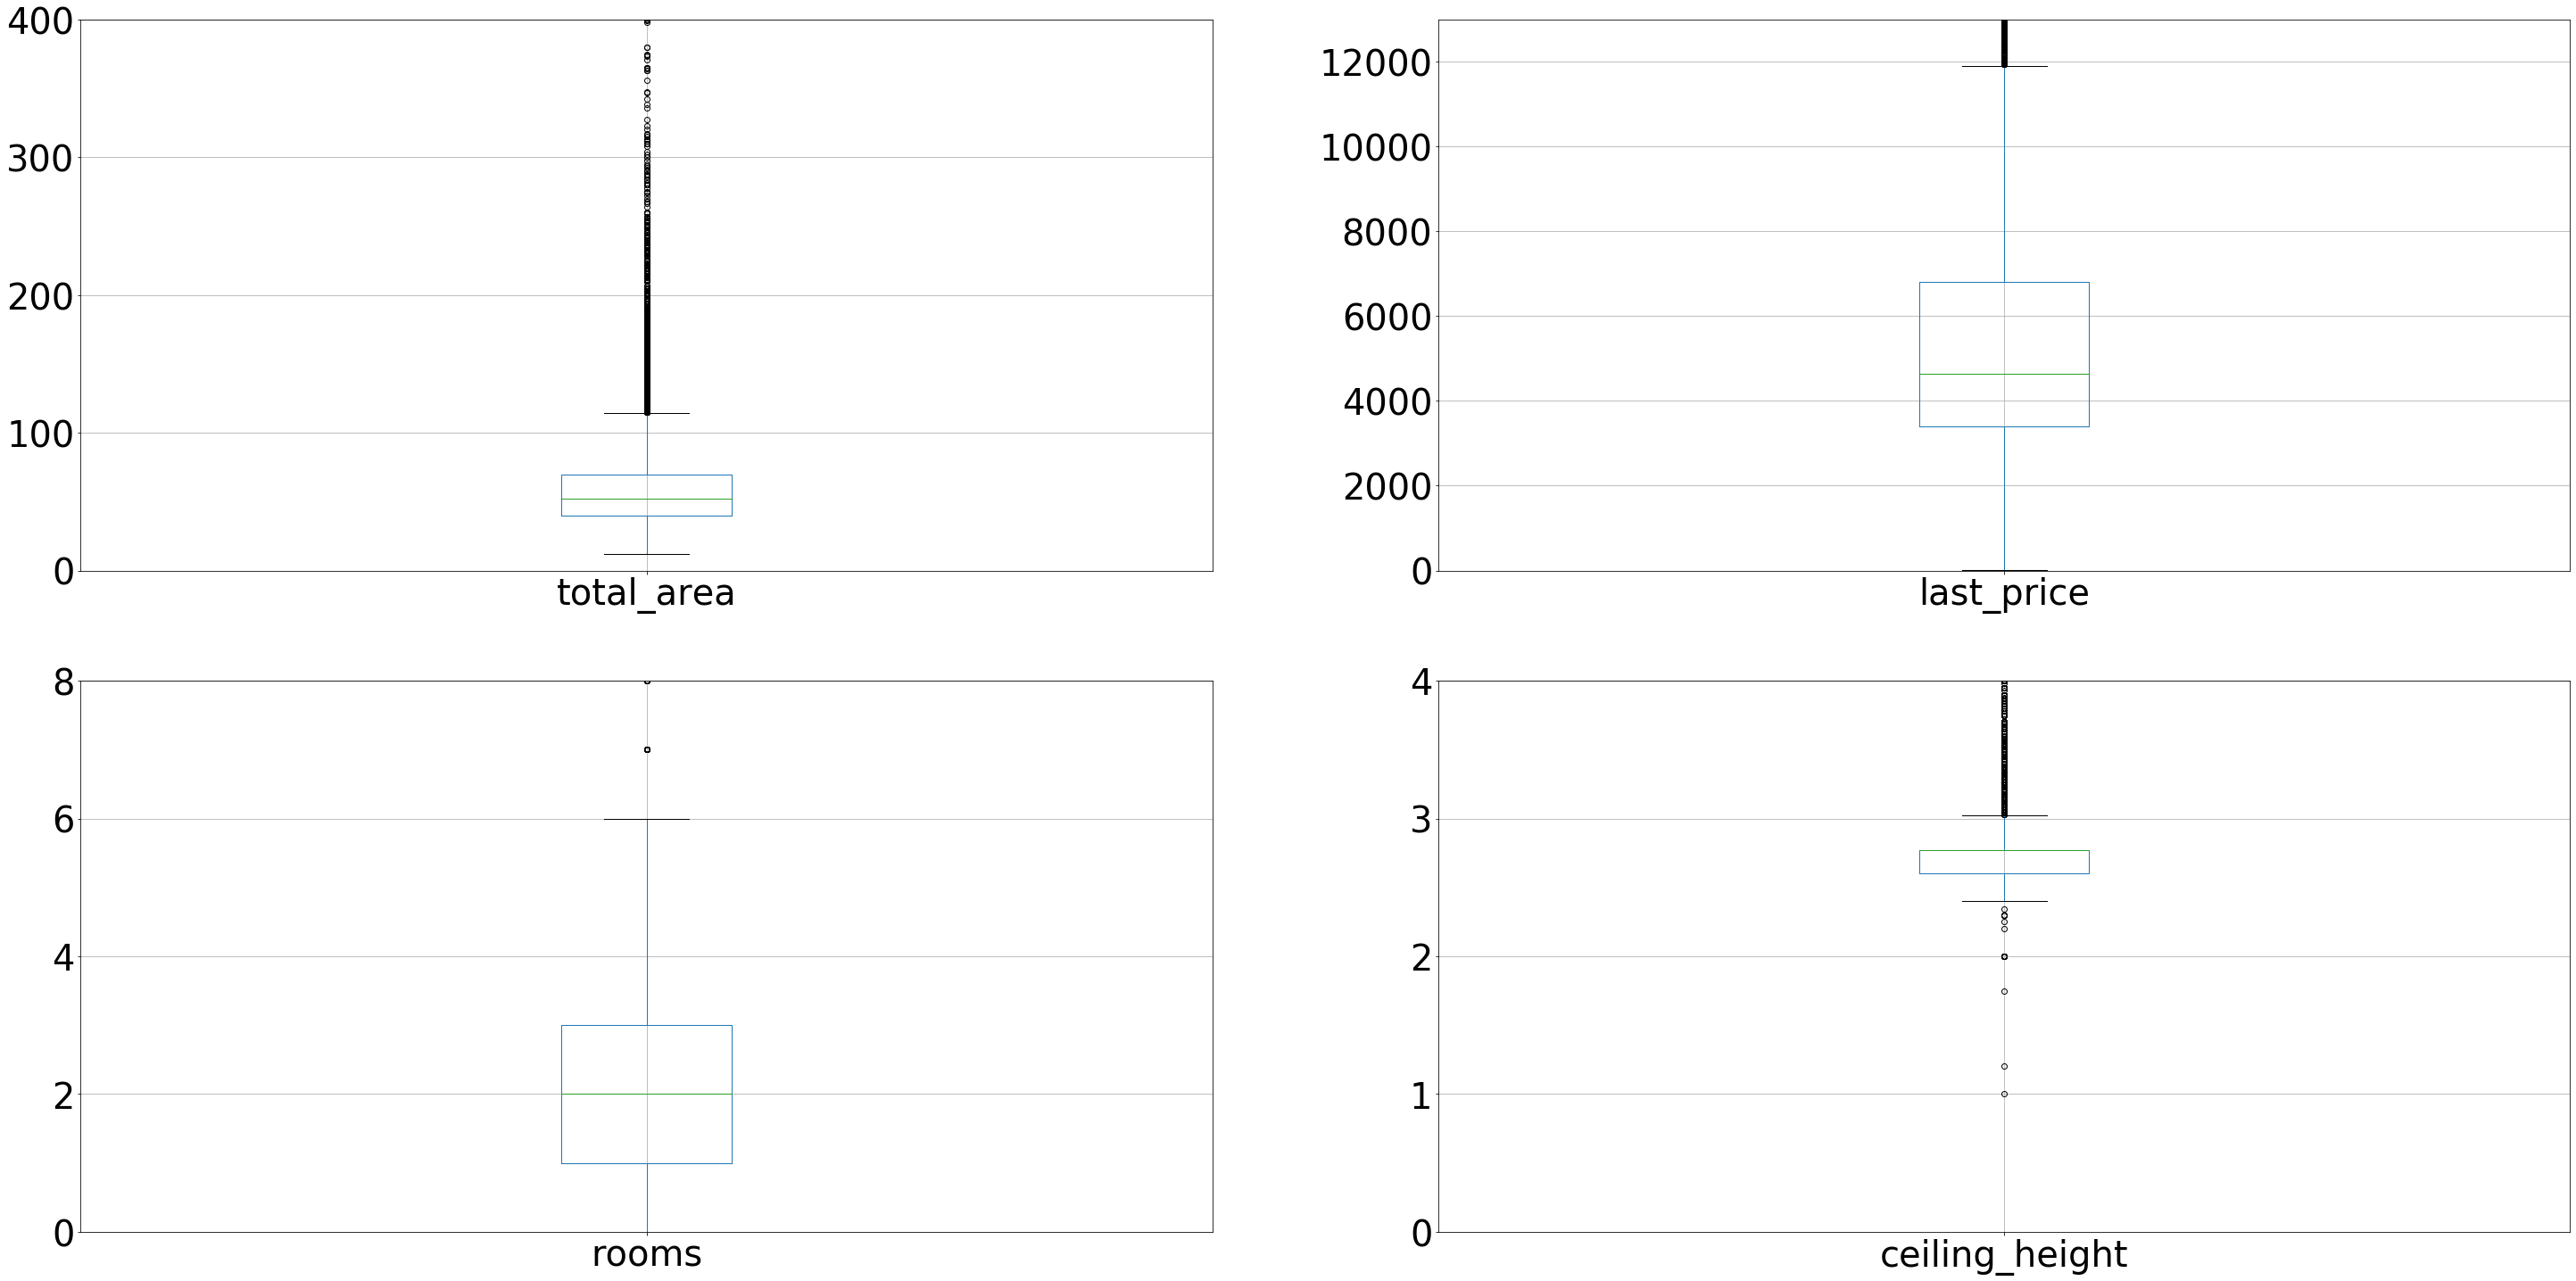

In [40]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [400, 13000, 8, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = residence.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Из построенных диаграмм видно что для дальнейшей работы нам надо брать следующие размахи:
    - total_area - от 15 до 110 кв. м.;
    - last_price - от 0 до 12 млн. руб.;
    - rooms - от 0 до 6 комнат;
    - ceiling_height - высота потолков от 2,5 до 3 м.

Строим гистограммы 'total_area', 'last_price', 'rooms', 'ceiling_height'

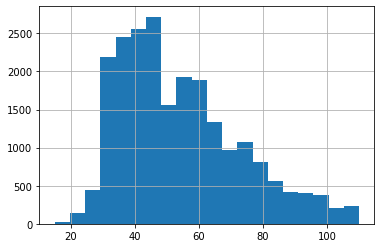

In [41]:
residence['total_area'].hist(bins=20, range=(15, 110))

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Наглядная визуализация, только не забывай подписывать оси на графиках

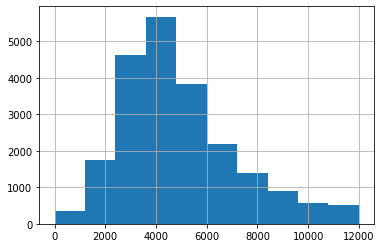

In [42]:
residence['last_price'].hist(bins=10, range=(0, 12000))

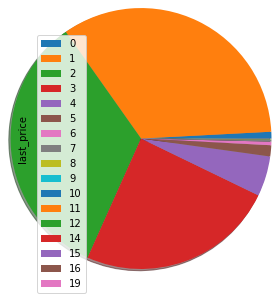

In [43]:
rooms_pivot = residence.pivot_table(index='rooms', values='last_price', aggfunc='count')
rooms_pivot.plot(kind='pie', y = "last_price", labels=None, radius=1.5, shadow=True)

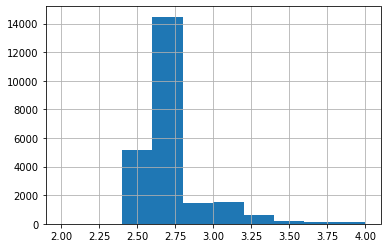

In [44]:
residence['ceiling_height'].hist(bins=10, range=(2, 4))

Основная часть квартир в наборе данных имеет общую площадь в диапазоне от 30 до 80 кв. м.
Предположительно гистограммы по площаде и цене должны были быть очень схожи, так и получилось, основаная часть объявлений в наборе имеет цену в диапазоне от 2.5 до 8 млн. руб.
Большинство квартир имеет высоту потолков 2.75 м.
Как и ожидалось, большинство квартир 1, 2х и 3х комнатные.

### Изучим и построим гистограммы слудующих параметров - время продажи квартир. Построим гистограмму. Посчитаем среднее и медиану

Для начала найдем среднее и медиану.

In [45]:
residence['days_exposition'].median()

95.0

In [46]:
residence['days_exposition'].mean()

169.36022616988058

Среднее время продажи 95 дней, медиана 169. Больше пока добавить нечего, в данных может быть большое количество выбрсово связанных с особенностями работы сервисов по продаже недвижимости и необязательностью пользователей, построим диаграмму размаха.

In [ ]:
residence.boxplot(column='days_exposition')

Построим гистограмму ограничив дни продажи объекта значением 400.

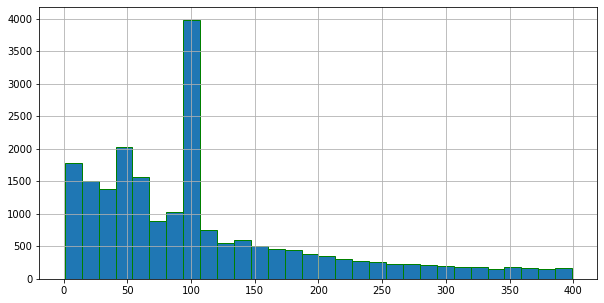

In [48]:
residence.query('days_exposition<400')['days_exposition'].hist(bins=30, figsize=(10,5), ec='green')
                                                               

Логика говорит что пиков в этой диаграмме быть не должно вообще, если только спрос на объекты не был стимулирован каким-либо внешним событием, таковых на моей памяти нет, посмотрим гистограмму ближе, надо рассмотреть пиковые значения.

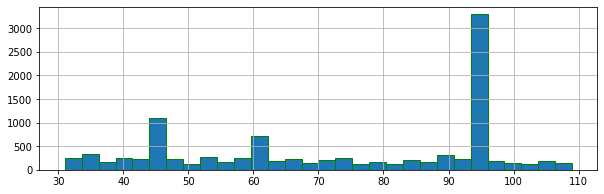

In [49]:
residence.query('30<days_exposition<110')['days_exposition'].hist(bins=30, figsize=(10,3), ec='green')

45, 60 и 95 явно выбиваются из общей логики, из опыта общения с сервисами торговли и сдачи жилой недвижимости, одно время вели деятельность в сфере посуточной аренды квартиры, могу предположить что в эти дни сервис закрывает объявления, хозяева их вновь выставляют на продажу и через 15-30 дней они снова закрываются, думаю среди этих квартир есть ужасно не ликвидные варианты.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё абсолютно верно, радует,что пишешь такие подробные и всепокрывающие выводы

### Изучим зависит ли цена от квадратного метра, числа комнат, удалённости от центра

Для своего удобства, напишем функцию для построения интересующих нас графиков

In [50]:
# эту функцию нашел в интернете, разобрал, мне очень понравилось автоматизация и 
#приведение к одному виду своих графиков, решил оставить себе

def dependency_graph(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'center_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_km': 'Зависимость цены от удаленности от центра города'}
    if column == 'level' or column == 'center_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'center_category':
        fontsize = 10
    else:
        fontsize = 10
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='green', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(14,5))
    ax2 = plt.gca()
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_km':
        plt.xticks(rotation=0)
    return plot

Построим график зависимости цены от количества комнат

Для начала посмотрим на диаграмму размаха

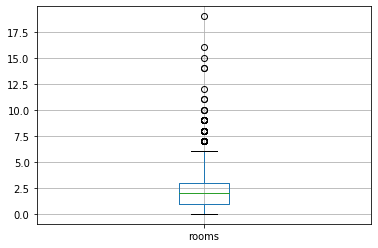

In [51]:
residence.boxplot(column='rooms')

Теперь можем построить гистограмму без учета лишних данных.

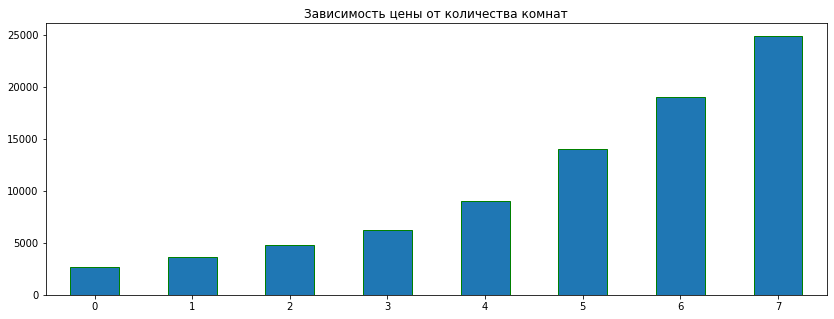

In [52]:
dependency_graph(residence.query('rooms <= 7'), 'rooms')

Гистограмма выглядит очень логично, чем больше комнат тем выше цена. Идем дальше.

Построим гистограмму зависимости от этажа - первый, послений и другой.

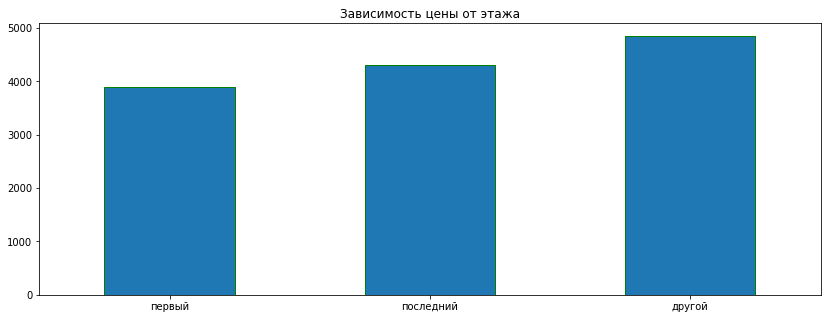

In [53]:
dependency_graph(residence, 'level')

Все выходит логично, как в песне В. Цоя, он в своем время пропел "первый и последний не предлагать, рядом с метро центр....", у нас так же, на "другой" выше цена и выше спрос.

Для построения диаграммы по удаленности от центра, добавим столбец с категорией удаленности.

In [54]:
def beautiful_far_away(ln):
    if ln < 3000:
        return 'центр'
    elif ln > 3000 and ln < 7000:
        return 'почти центр'
    elif ln > 7000 and ln < 15000:
        return 'в черте города'
    elif ln >= 15000:
        return 'область'

residence['center_category'] = residence['cityCenters_nearest'].apply(beautiful_far_away)
#residence.sample(10)
#residence.info()
#residence[['locality_name', 'cityCenters_nearest', 'center_category']].sample(10)

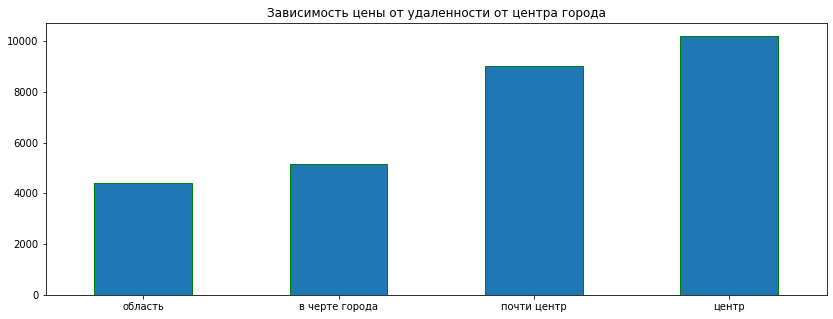

In [55]:
dependency_graph(residence, 'center_category')

Здесь все так же логично, чем ближе к центру тем дороже,и наоборот.

### Изучим зависимость стоимости от даты размещения: дня недели, месяца и года

Напишем функцию под наши задачи.

In [56]:
def dependency_dmy_price(df, ylims=None):
    dmy_to_plot = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']
    for i in range(len(dmy_to_plot)):
        df_to_plot = df.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='green',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='green',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if dmy_to_plot[i] != 'day':
            plt.xticks(rotation=0)
    return plot

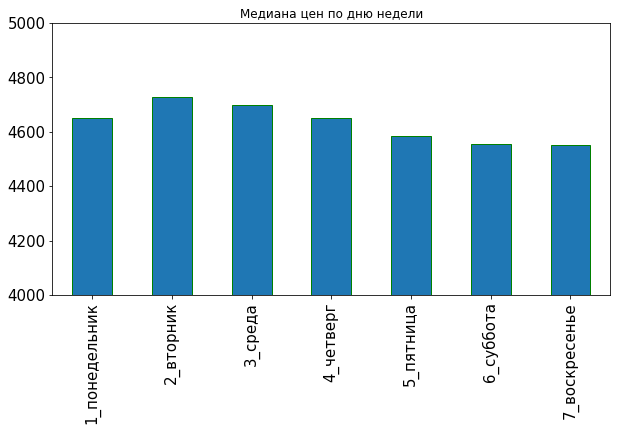

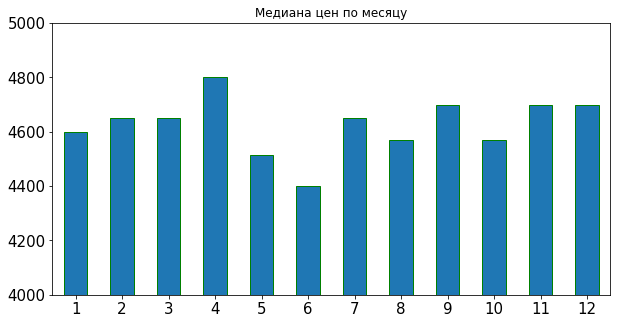

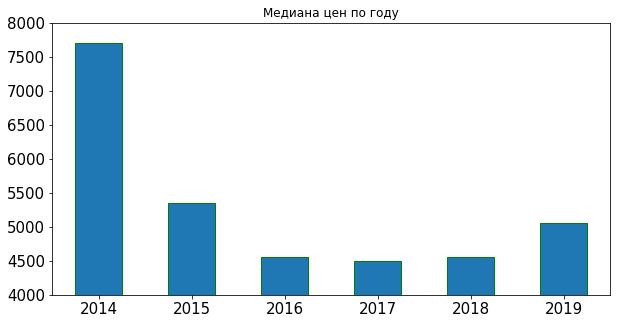

In [57]:
dependency_dmy_price(residence, ylims=[(4000, 5000), (4000, 5000), (4000, 8000)])

День недели - зависимости нет.
Месяц - до наступления теплых месяцев, как и во многих индустриях идет набор оборотов, апрель пик, с мая на спад.
Год - 2014 год был началом кризиса, солабления рубля и общей истерией в обществе в конце года, думаю этот пик связан именно с этим, других объяснений быть не может, такие скачки всегда вызваны серьезными влияниями среды.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Верно

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим населённые пункты с самой высокой и низкой стоимостью жилья

Создадим таблицу с топ10 городов, добавим туда среднюю цену квадратного метра 

In [58]:
#выбираем топ10
top10_city = residence['locality_name'].value_counts().index.tolist()[:10]

#считаем среднюю цену за квадратный метр
mean10_metrics = [residence[residence['locality_name'] == city]['price_m2'].median() for city in top10_city]

#соберем все сведения в одну таблицу
frame = {'Город': top10_city, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics}
top10_city_frame = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
top10_city_frame

,Город,"Средняя цена за кв.м., тыс. руб."
0,Санкт-Петербург,104.0
4,Пушкин,100.0
6,посёлок Парголово,91.0
8,деревня Кудрово,91.0
1,посёлок Мурино,85.5
2,посёлок Шушары,76.0
5,Колпино,74.0
7,Гатчина,67.0
3,Всеволожск,65.0
9,Выборг,58.0


В северной столице самые дорогие объекты, не сильно отстал Пушкин, и это не удивительно, царское же село. Выборг замыкает топ10, его средняя стоимость квадратного метра сильно проигрывает лидерам, почти в 2 раза.

### Выделим квартиры в Санкт-Петербурге и:
- выясним, какая область входит в центр города;
- создадим столбец с расстоянием до центра в километрах и округлим до целых значений;
- посчитаем среднюю цену для каждого километра;
- построим график: как цена зависит от удалённости от центра.

Для решения это задачи создадим переменную spb куда запишем данные по г. Санкт-Петербург, посчитаем среднюю цену каждого километра и построим график.

In [82]:
spb = residence.query('locality_name == "Санкт-Петербург"')

#посчитаем среднюю цену каждого километра и добавим в таблицу

spb.loc[:, 'cityCenters_nearest_km'] = (spb.loc[:, 'cityCenters_nearest']/1000).round()
#spb.sample(20)

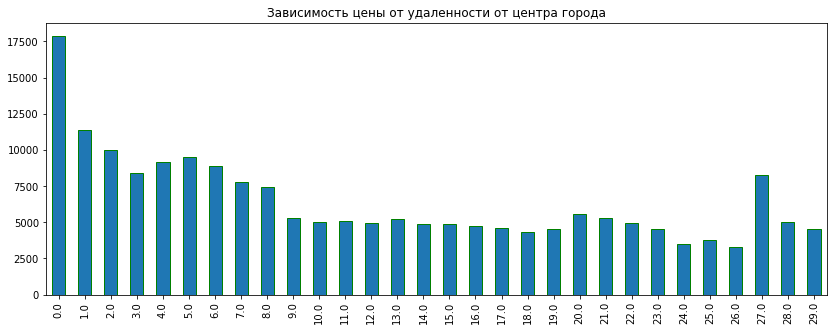

In [60]:
dependency_graph(spb, 'cityCenters_nearest_km')

Наблюдаем достаточно логичную картину, чем ближе к центру - тем дороже, сильно выбивается значение на удалении в 27 км, я проверил, по Яндекс.Картам до г. Пушкин около 30 км, думаю данные этого города и сидят в столбце. 

Центром по моим догадкам можно считать порог в 2 км, дальше график резко пдает и начинает расти до значения в 8 км, осмелюсь предположить что до 2 км это исторический центр города, до 8 км это современное жильё разной степени элитности.

### Выделим сегмент квартир в центре Санкт-Петербурга и проанализируем эту территорию:
- изучим следующие параметры: площадь, цена, число комнат, высота потолков;
- выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
- сделаем выводы - отличаются ли они от общих выводов по всему городу?

Выделим объекты в центральной зоне города. Те что в пределах 2 км обозначим как исторический центр Спб, от 2 до 8 км как просто центр города.

In [61]:
center_spb = spb.query('2000 <= cityCenters_nearest <= 8000') #допустим все центр что в 8 км
center_spb_history = spb.query('cityCenters_nearest <= 2000') #допустим исторический центр в пределах 2 км

In [62]:
print('Количество квартир в центральной зоне Санкт-Петербурга -', center_spb.shape[0])
print('Количество квартир в исторической зоне Санкт-Петербурга -', center_spb_history.shape[0])

Количество квартир в центральной зоне Санкт-Петербурга - 3386
Количество квартир в исторической зоне Санкт-Петербурга - 326


Построим гитсограммы по каждому из интересующих нас параметру - площадь, цена, число комнат, высота потолков.

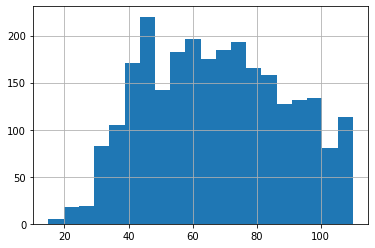

In [63]:
center_spb['total_area'].hist(bins=20, range=(15, 110))

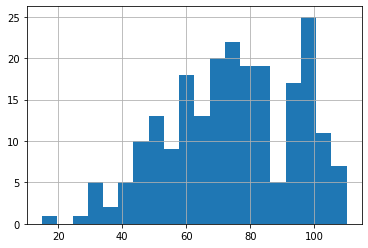

In [64]:
center_spb_history['total_area'].hist(bins=20, range=(15, 110))

Что касается площади, гистограммы отличаются, маленьких квартир в историческом центре мало.

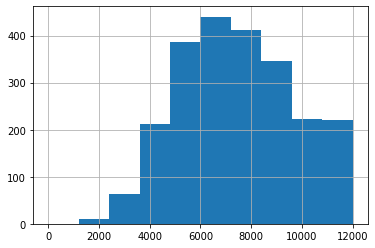

In [65]:
center_spb['last_price'].hist(bins=10, range=(0, 12000))

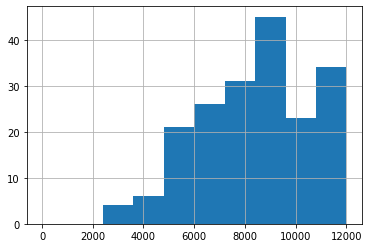

In [66]:
center_spb_history['last_price'].hist(bins=10, range=(0, 12000))

Что касается цены, картина без откровений, дешевых квартир в историческом центре меньше, но в целом графика схожа.

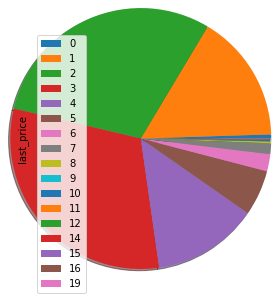

In [67]:
rooms_spb_pivot = center_spb.pivot_table(index='rooms', values='last_price', aggfunc='count')
rooms_spb_pivot.plot(kind='pie', y = "last_price", labels=None, radius=1.5, shadow=True)

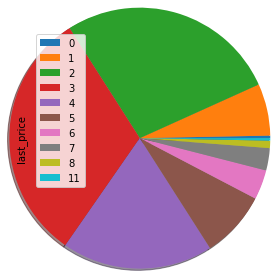

In [68]:
rooms_spb_h_pivot = center_spb_history.pivot_table(index='rooms', values='last_price', aggfunc='count')
rooms_spb_h_pivot.plot(kind='pie', y = "last_price", labels=None, radius=1.5, shadow=True)

Что касается цены, количества комнат, то бросается в глаза уменьшение доли 1 комнатных объектов в наборе данных 8км в сравнении с историческим центром 2 км.

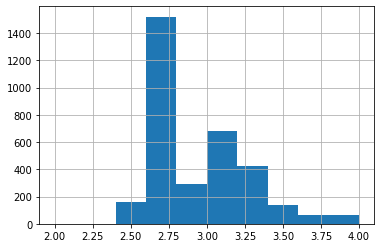

In [69]:
center_spb['ceiling_height'].hist(bins=10, range=(2, 4))

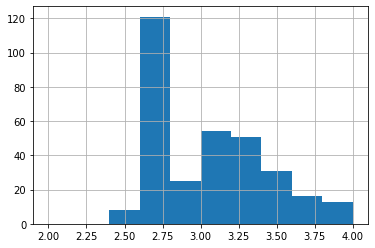

In [70]:
center_spb_history['ceiling_height'].hist(bins=10, range=(2, 4))

Графики практически идентичны, без откровений.

In [1]:
dependency_graph(center_spb.query('rooms <= 7'), 'rooms')

NameError: name 'dependency_graph' is not defined

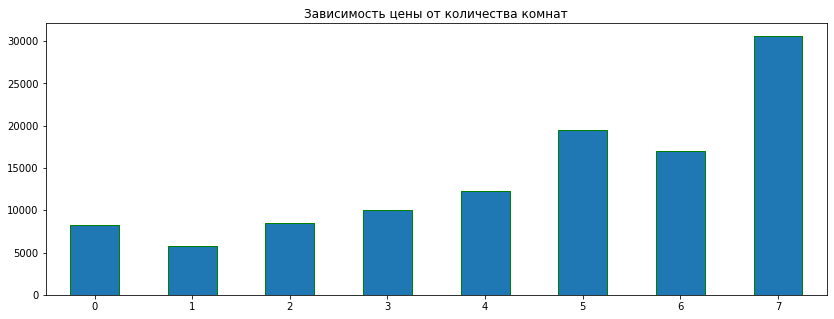

In [72]:
dependency_graph(center_spb_history.query('rooms <= 7'), 'rooms')

Здесь все выглядит логично, по так называемому историческому центру выбились значения 5ти комнатных квартир, но думаю это частный случай, из за мелковатой выборки.

Посмотрим на зависимость от этажности.

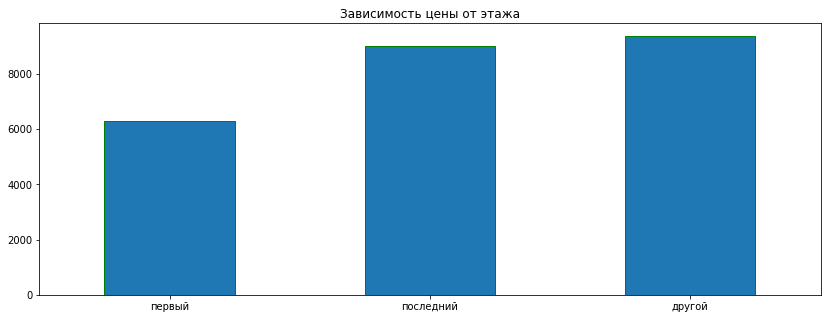

In [73]:
dependency_graph(center_spb, 'level')

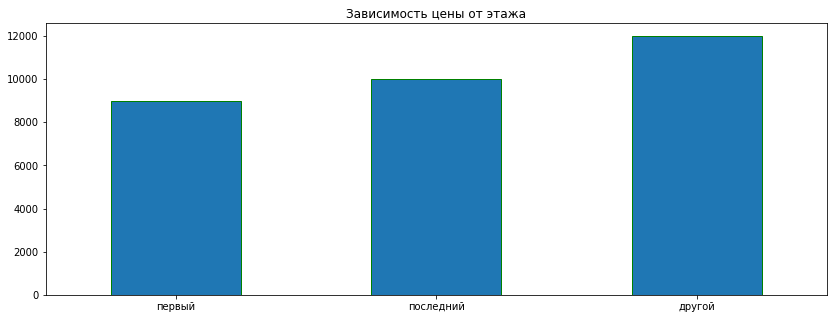

In [74]:
dependency_graph(center_spb_history, 'level')

По этажности картина в принципе схожа с общим анализом, но есть одно но, если говорить про выборку 8км, то разница между "последний" и "другой" не так значительна как в выборке исторического центра - 2 км. Хочется связать это с ветхостью исторического жилья, жизнь на последнем этаже там может быть связана с рядом проблем, когда как в более современной застройке в радиусе 8 км, этот параметр уже не так важен.

Посмотрим на гистограммы по мере удаленности от центра, выбранных выборок.

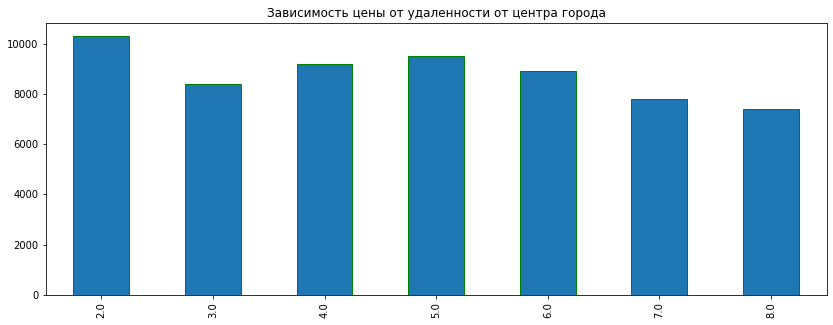

In [75]:
dependency_graph(center_spb, 'cityCenters_nearest_km')

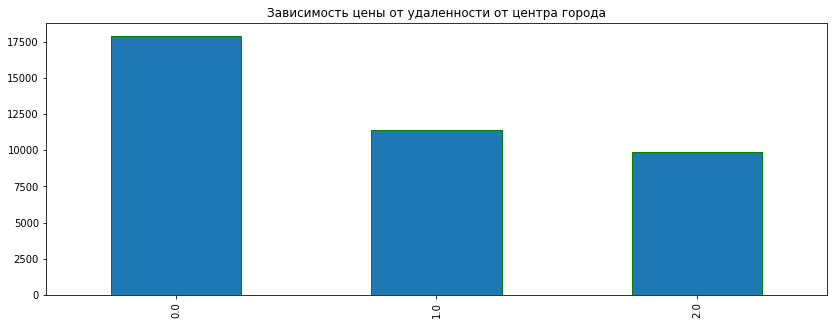

In [76]:
dependency_graph(center_spb_history, 'cityCenters_nearest_km')

Все выглядит в пределах логики, чем дальше, тем дешевле.

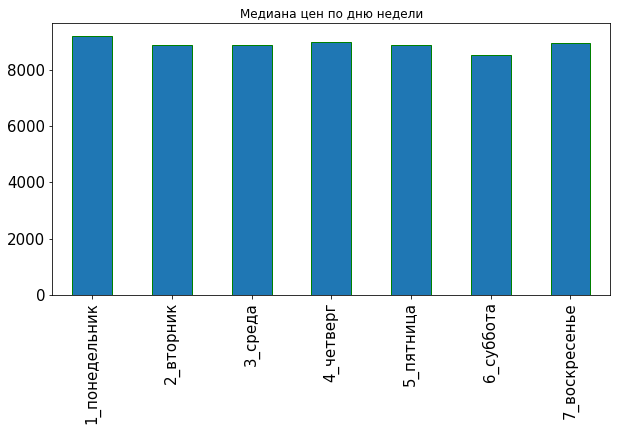

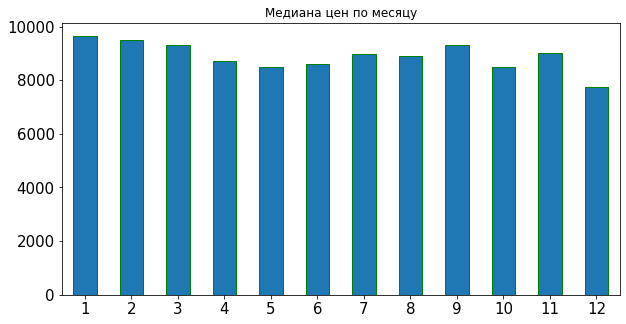

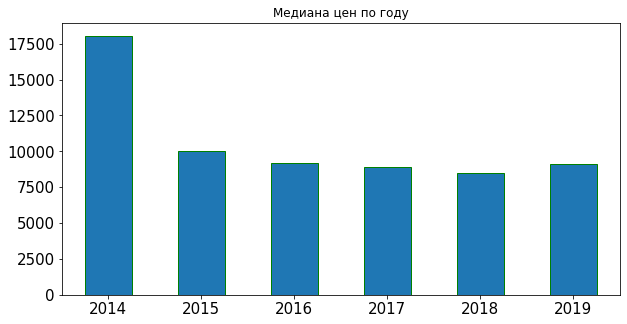

In [77]:
dependency_dmy_price(center_spb)

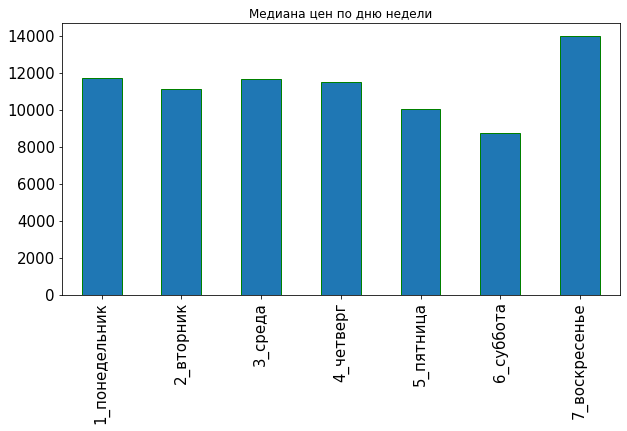

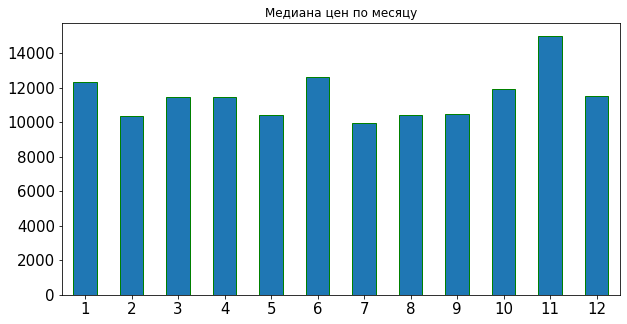

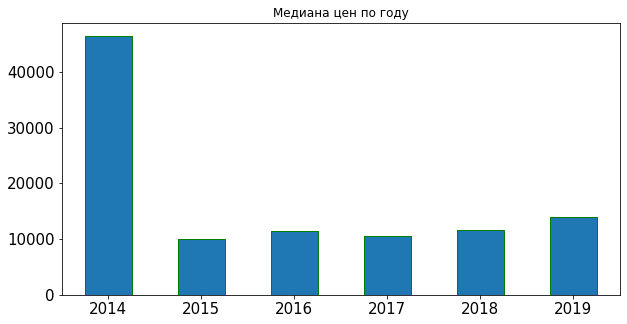

In [78]:
dependency_dmy_price(center_spb_history)

Что касается анализа зависимости цены от даты размещения, то здесь картина в принципе похожа на ту что мы наблюдали ранее по всей выборке.

Но есть пара наблюдений, касаемых исторического центра, если посмотреть на графики составленные по годам, то дельта между 2015 и 2014 годом в выборке исторического центра гораздо больше аналогичной дельты в выборке 8км центра. Т.е. держатели более представительного и дорого жилья так же подвержены влиянию среды, но ставки выше, графики более выразительны. Ниже представлены аналогичные сведения по набору данных без Санк-Петербурга, картины схожи.

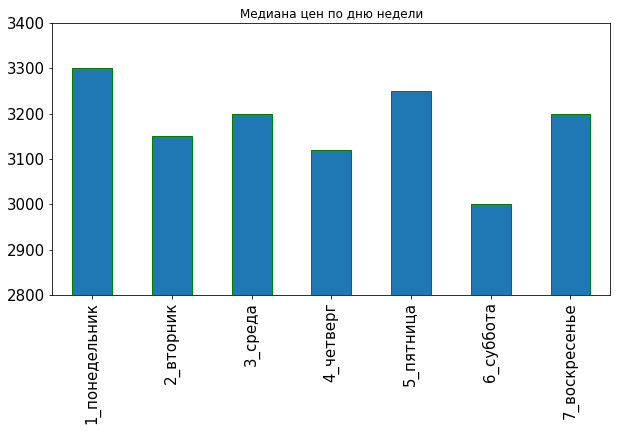

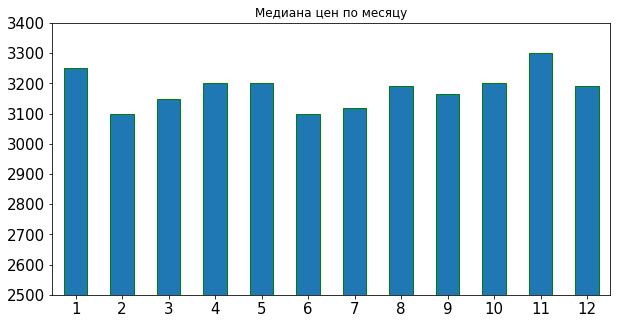

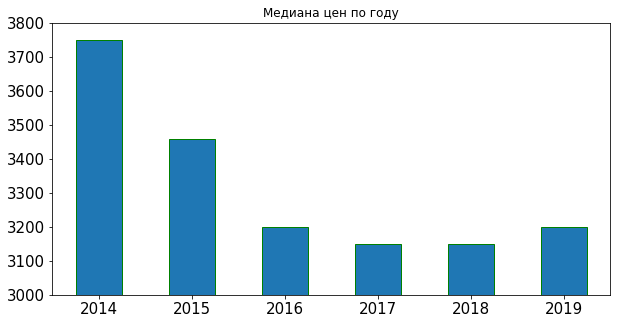

In [79]:
no_spb = residence.query('locality_name != "Санкт-Петербург"')
dependency_dmy_price(no_spb, ylims=[(2800, 3400), (2500, 3400), (3000, 3800)])

Посмотрим как коррелирует цена объекта с другими величинами в наборе данных по всему набору и по историческому центру.

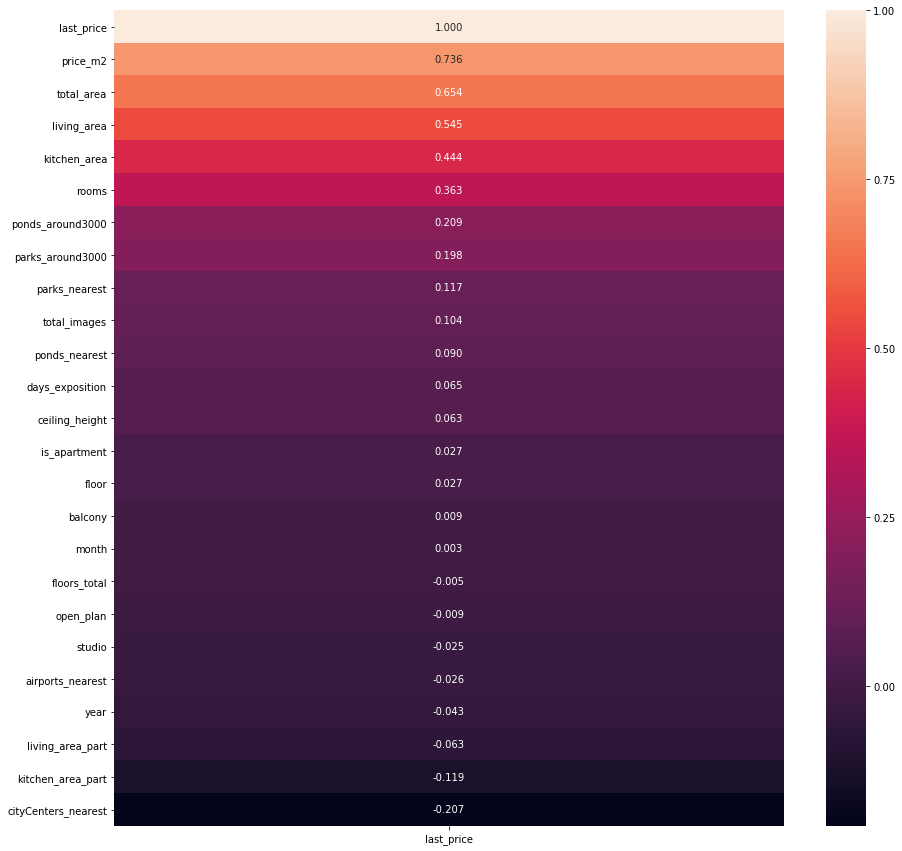

In [80]:
#построим график для всего набора
plt.figure(figsize=(15,15))
sns.heatmap(residence.corr()[['last_price']].sort_values(by='last_price', ascending=False), 
            annot=True, fmt='.3f')

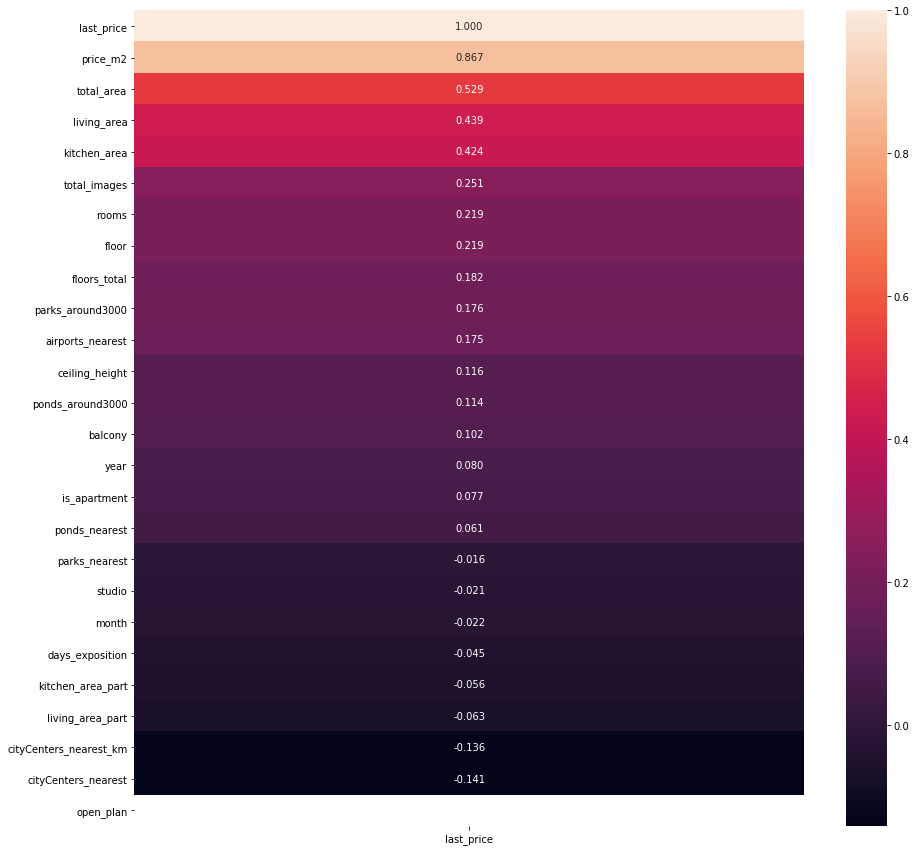

In [81]:
#построим график для исторического центра
plt.figure(figsize=(15,15))
sns.heatmap(center_spb_history.corr()[['last_price']].sort_values(by='last_price', ascending=False), 
            annot=True, fmt='.3f')

У исторического центра меньше зависимость цены от общей и жилой площади чем у всего набора данных, но гораздо больше от цены за квадратный метр, т.е. за большие деньги мы покупаем меньше жилья, зависимость очевидная, но график красивый.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

### Шаг 5. Общий вывод

По большому счету тенденции схожи как для Санкт-Петербурга так и для остальных городов представленных в выборке, за маленькими но дорогими исключениями объектов находящихся в историческом центре города, таких как последний этаж.
Графики зависимости от года к году показывают, что намечается тенденция к увеличению цен, восстанавливается покупательская способность граждан, если не произойдет нового потрясения, думаю в 2020 и 2021 годах график должен расти.

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но можно было бы написать и больше выводов


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)